# Random Forest(Fraud Check)


# Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.shape

(600, 6)

In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df['Undergrad']= df['Undergrad'].apply(lambda x: 1 if x=='YES' else 0)
df['Urban']= df['Urban'].apply(lambda x: 1 if x=='YES' else 0)
df['Taxable.Income']= df['Taxable.Income'].apply(lambda x: 'Risky' if x>30000 else 'Good')

In [7]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [8]:
df['Marital.Status'] = df['Marital.Status'].map({'Single':1, 'Married':2, 'Divorced':3})


In [9]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,Risky,50047,10,1
1,1,3,Risky,134075,18,1
2,0,2,Risky,160205,30,1
3,1,1,Risky,193264,15,1
4,0,2,Risky,27533,28,0


In [10]:
df['Marital.Status'].value_counts()

1    217
2    194
3    189
Name: Marital.Status, dtype: int64

In [11]:
import seaborn as sns

In [12]:
# riskey = 0, good = 1

df['Taxable.Income']= df['Taxable.Income'].apply(lambda x: 0 if x=='Risky'else 1)

In [13]:
# Train test the Data

train = df.drop('Taxable.Income', axis=1)
test = df['Taxable.Income']

In [14]:
# Train test split

from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state = 1)

In [16]:
# Standardize the Data

from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
col = x_train.columns
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [19]:
x_train.shape

(420, 5)

In [20]:
x_test.shape

(180, 5)

In [21]:
# Build random forest


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,0,50047,10,1
1,1,3,0,134075,18,1


In [24]:
rf_model = RandomForestClassifier(n_estimators= 100)
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
rf_model_pred = rf_model.predict(x_test)

In [26]:
rf_model_actual_predict = pd.DataFrame({'Actual': y_test, 'Predict': rf_model_pred})

In [27]:
rf_model_actual_predict[20:40]

,Actual,Predict
13,0,0
510,0,0
268,0,0
358,0,0
289,0,1
483,1,0
429,0,0
47,0,0
223,0,0
185,0,0


In [28]:
rf_model.score(x_test, y_test)*100

77.77777777777779

In [29]:
# Apply Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
bg = BaggingClassifier(base_estimator = DecisionTreeClassifier(), max_samples =0.5, max_features = 1.0, n_estimators = 100, random_state = 8 )

In [31]:
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=100, random_state=8)

In [32]:
bg_prid = bg.predict(x_test)

In [33]:
bg_actual_prid = pd.DataFrame({'Actual': y_test, 'predict': bg_prid})

In [34]:
bg_actual_prid[:10]

,Actual,predict
446,1,0
404,0,0
509,1,0
455,0,0
201,0,0
23,0,0
415,0,0
548,0,0
66,0,0
165,0,0


In [35]:
bg.score(x_test, y_test)

0.7888888888888889

In [36]:
# Ada Boosting

from sklearn.ensemble import AdaBoostClassifier

In [37]:
boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, learning_rate=1)

In [38]:
boost.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=100)

In [39]:
boost_pred = boost.predict(x_test)

In [40]:
boost_actual_predict = pd.DataFrame({'Actual': y_test, 'predict': boost_pred})

In [41]:
boost_actual_predict[:10]

,Actual,predict
446,1,1
404,0,1
509,1,0
455,0,0
201,0,0
23,0,0
415,0,1
548,0,0
66,0,0
165,0,1


In [42]:
boost.score(x_test, y_test)

0.6611111111111111

In [43]:
# Build the Random Forest model using kfold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [44]:
kfold = KFold(n_splits=10)
num_trees = 100
max_feature = 3
rfc = RandomForestClassifier(n_estimators=num_trees, max_features = max_feature)
rfc = cross_val_score(rfc, train, test, cv = kfold)
rfc

array([0.75      , 0.75      , 0.65      , 0.68333333, 0.75      ,
       0.66666667, 0.85      , 0.7       , 0.76666667, 0.86666667])

In [45]:
rfc.mean()*100

74.33333333333334

In [46]:
rfc.std()*100

6.879922480183431

# Company Data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import pydotplus

In [48]:
df = pd.read_csv(r"Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [49]:
df1 = df.copy()

In [50]:
df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [51]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

# Outlier Check

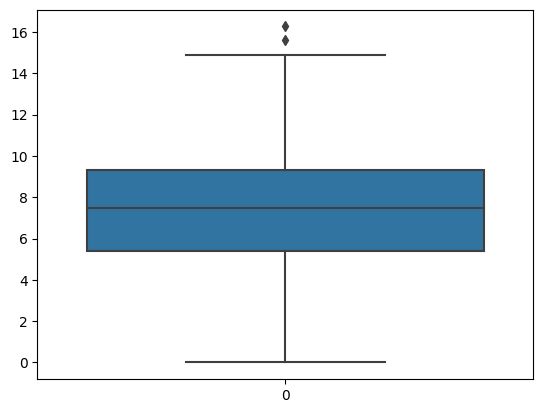

In [52]:
ax = sns.boxplot(df1['Sales'])
plt.show()

# The data has 2 outlier instances

In [53]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


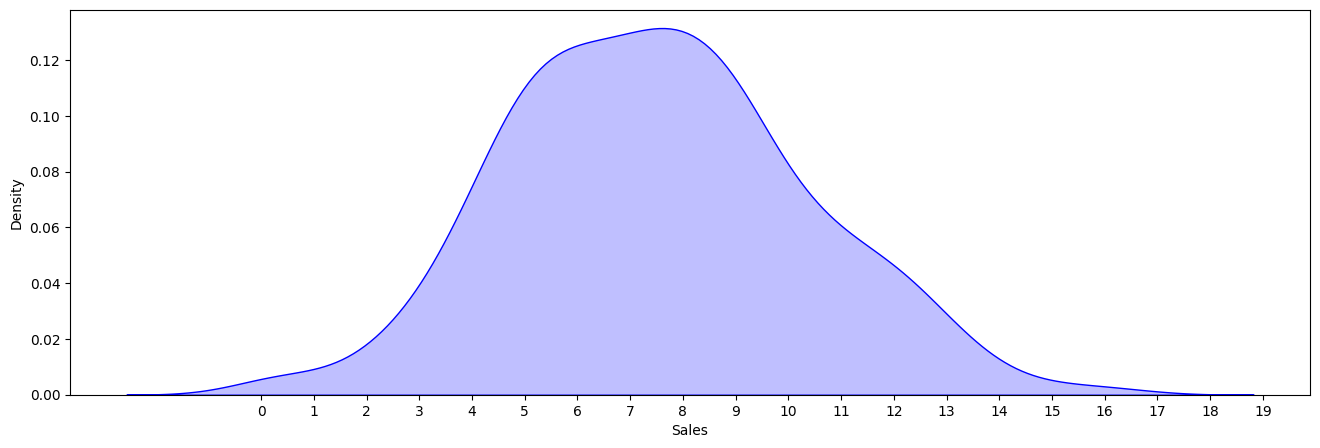

In [54]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='b')
plt.xticks([i for i in range(0,20,1)])
plt.show()

# The data is Skwed on the right


# The data has negative Kurtosis

In [55]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

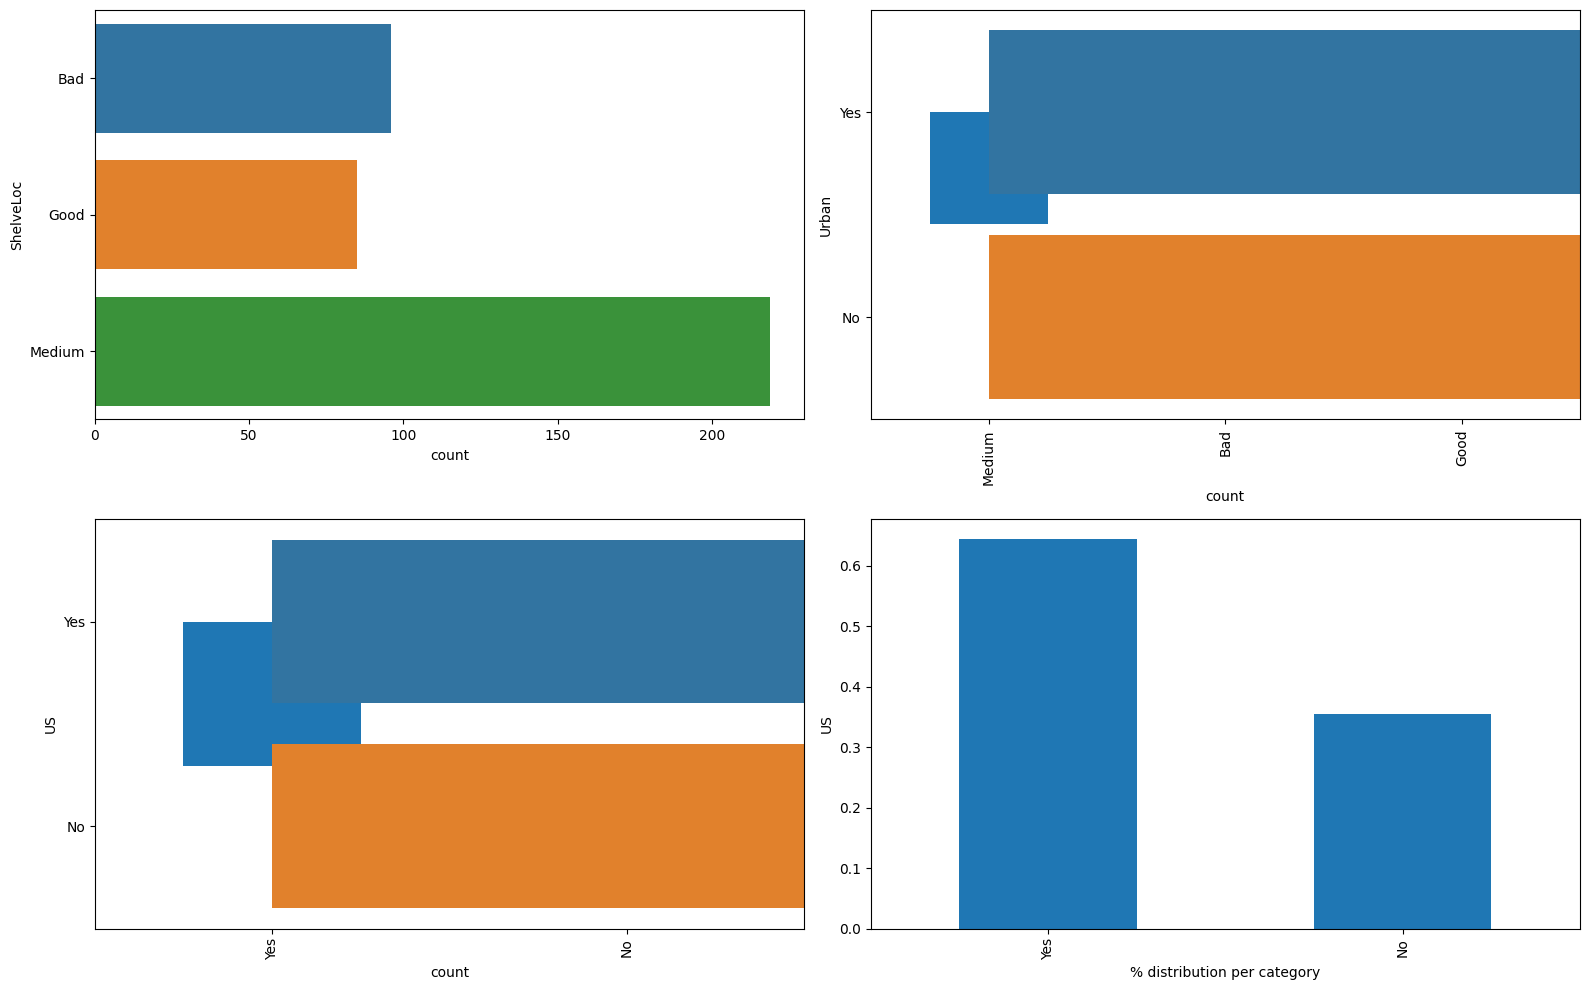

In [56]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [57]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

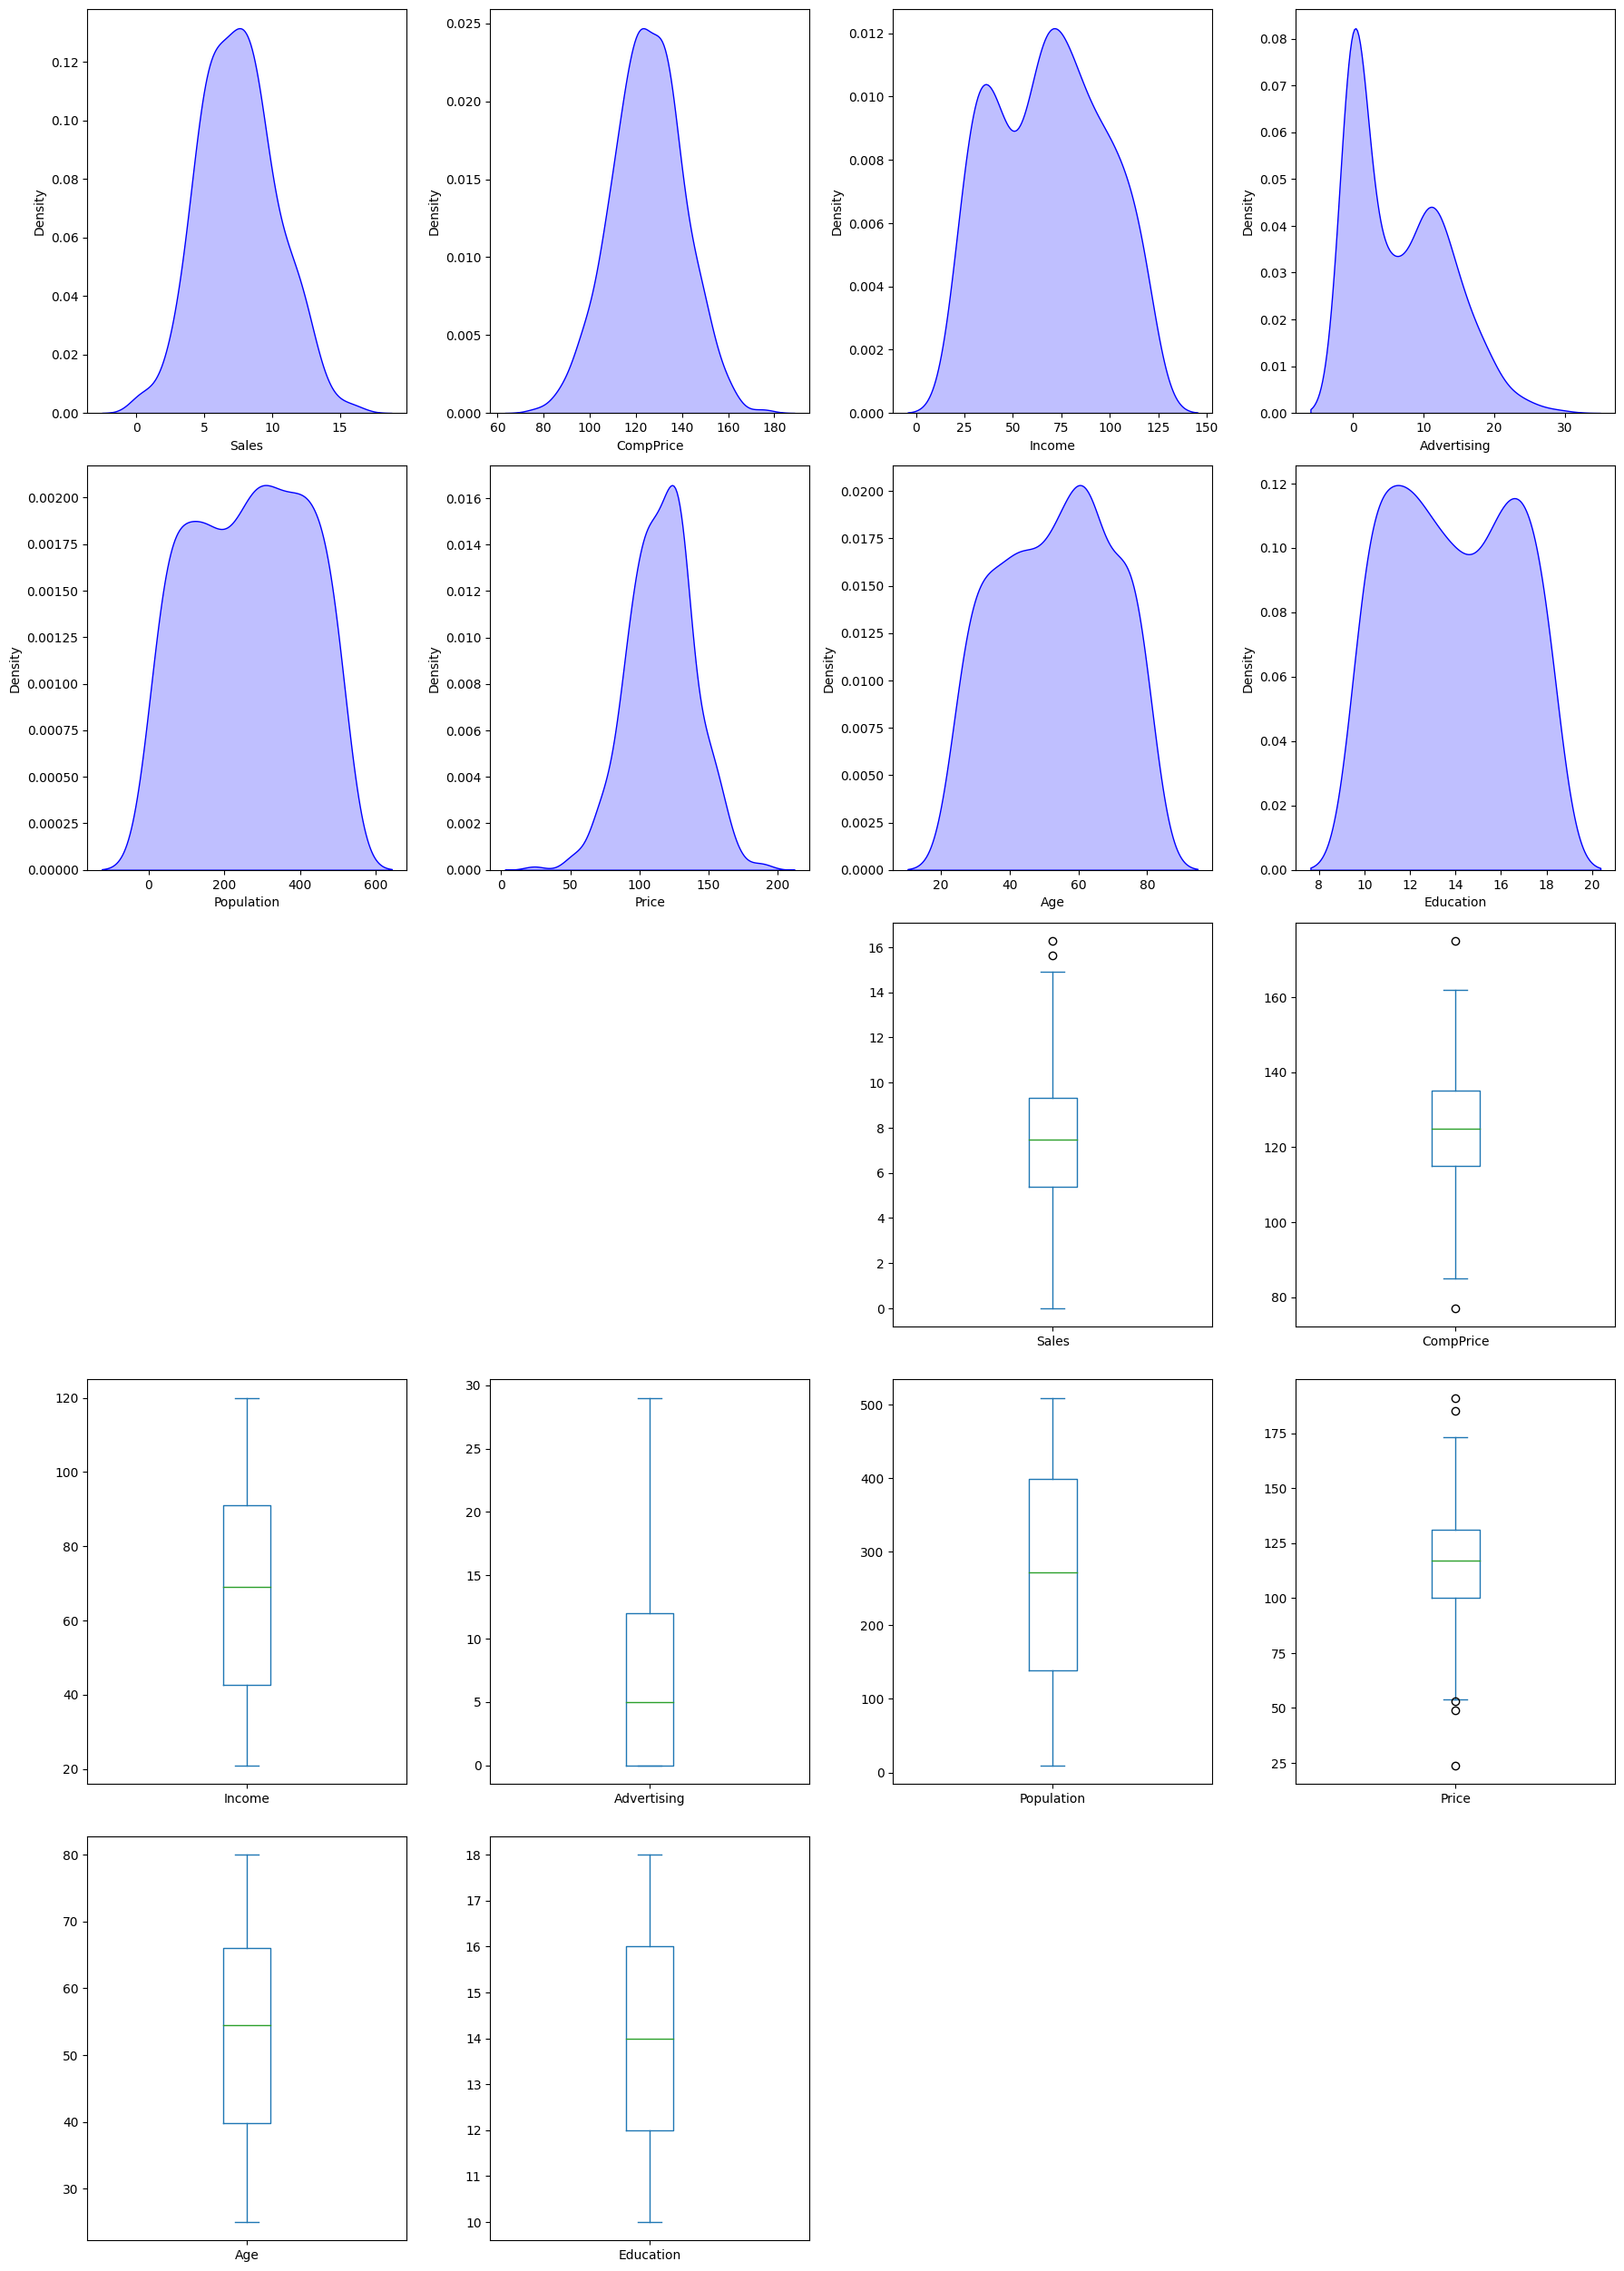

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [58]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


In [59]:
corr = df1.corr()

In [60]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])


In [61]:
corr = df1.corr()

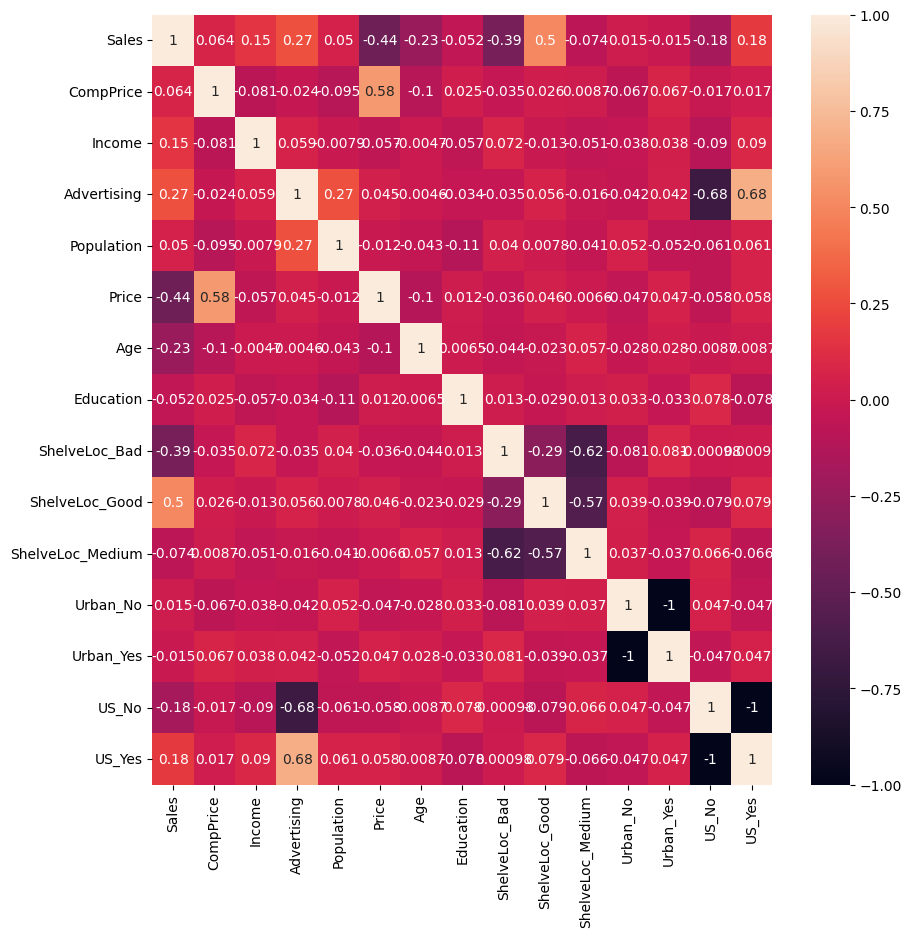

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

# Random Forest Model

# Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [63]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [64]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [66]:
y_train.value_counts()

large    164
small    156
Name: sales, dtype: int64

In [67]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.8125

In [68]:
pred_train = model.predict(x_train)

In [69]:
accuracy_score(y_train,pred_train)

1.0

In [70]:
confusion_matrix(y_train,pred_train)

array([[164,   0],
       [  0, 156]], dtype=int64)

In [71]:
pred_test = model.predict(x_test)

In [72]:
accuracy_score(y_test,pred_test)

0.725

In [73]:
confusion_matrix(y_test,pred_test)

array([[25, 10],
       [12, 33]], dtype=int64)

In [74]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [75]:
df_t.head()

,Actual,Predicted
292,large,large
227,large,large
89,large,small
191,small,large
115,large,small


In [76]:
cols = list(df1.columns)

In [77]:
predictors = cols[0:14]
target = cols[14]

In [78]:
tree1 = model.estimators_[20]

In [79]:
dot_data = StringIO()

In [80]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [81]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Conclusion

# Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76%

# As seen in the confusion matrix of Test data 61 instances are presdected correctly and 19 instances are not

In [82]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [83]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [84]:
tree_small = rf_small.estimators_[5]

In [85]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [86]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [87]:
model.feature_importances_

array([0.10960817, 0.09963471, 0.1005614 , 0.09431104, 0.20558892,
       0.12181112, 0.06243972, 0.04285996, 0.08853894, 0.02486113,
       0.01384275, 0.01307523, 0.01167583, 0.01119107])

In [88]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [89]:
fi

,feature,importance
4,Price,0.205589
5,Age,0.121811
0,CompPrice,0.109608
2,Advertising,0.100561
1,Income,0.099635
3,Population,0.094311
8,ShelveLoc_Good,0.088539
6,Education,0.062440
7,ShelveLoc_Bad,0.042860
9,ShelveLoc_Medium,0.024861


As seen in the above table Price is most important feature